In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=49f84d79ddc8d86807abbbba7f0d34d04e58fde751ff6583047e3ce99f7ce424
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz

In [4]:
temperature=np.arange(0,101,1)  #universum
temperature

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
#defining membership functions
cold_membership=fuzz.trapmf(temperature,[0,0,10,20])
moderate_membership=fuzz.trimf(temperature,[10,20,30])
hot_membership=fuzz.trapmf(temperature,[20,30,100,100])

```
def cold_membership(temperature):
  if temperature<10:
    return 1.0
  elif temperature>=10 and temperature<20:
    return (20 - temperature)/10
  else:
    return 0.0
```
```
def moderate_membership(temperature):
  if temperature>=10 and temperature<20:
    return (temperature -10)/10
  elif temperature>=20 and temperature<30:
    return 1.0
  elif temperature>=30 and temperature<40:
    return (40 - temperature)/10
  else:
    return 0.0
```
```
def hot_membership(temperature):
  if temperature>=30 and temperature<40:
    return (temperature - 30)/10
  elif temperature>=40:
    return 1.0
  else:
    return 0.0
```

In [6]:
input_temp=18
#membership_degree=fuzz.interp_membership(universum,membership function, input value)
cold=fuzz.interp_membership(temperature, cold_membership,input_temp)
mid=fuzz.interp_membership(temperature, moderate_membership,input_temp)
hot=fuzz.interp_membership(temperature, hot_membership,input_temp)

In [7]:
print(f"Temperature {input_temp} celsius:")
print(f"Cold: {cold}")
print(f"Mid: {mid}")
print(f"Hot: {hot}")

Temperature 18 celsius:
Cold: 0.2
Mid: 0.8
Hot: 0.0


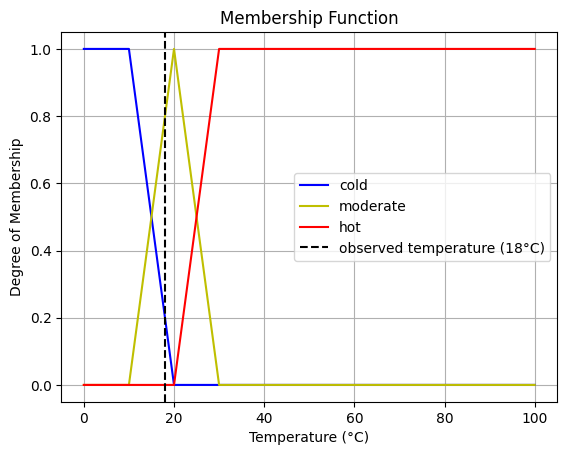

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(temperature, cold_membership, 'b', linewidth=1.5, label='cold')
plt.plot(temperature, moderate_membership, 'y', linewidth=1.5, label='moderate')
plt.plot(temperature, hot_membership, 'r', linewidth=1.5, label='hot')

plt.axvline(x=input_temp, color='k', linestyle='--', linewidth=1.5, label=f'observed temperature ({input_temp}°C)')  ####
plt.title("Membership Function")
plt.xlabel('Temperature (°C)')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()


https://gist.github.com/mvidalgarcia/5a157afa6b275d058126  

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html